## Propragation of gradients.

In [1]:
import torch
from torch import nn

from matplotlib import pyplot as plt

In [2]:
# The default if to not require gradients.
A = torch.ones((5,5))
A.requires_grad

False

In [3]:
# Requiring gradients of a tensor.
B = torch.ones((5,5), requires_grad=True)
B.requires_grad

True

In [4]:
# PyTorch tracks which tensor needs gradients throug
# the operations.
(A+B).requires_grad

True

# In a network.

In [5]:
# This network is too simple for actual predictions. 
net = nn.Sequential(nn.Conv2d(1, 4, 5), nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=3), 
                    nn.Flatten(), nn.Linear(1600, 1))

In [6]:
# Input to the network does not require gradients.
inp = torch.randn(32, 1, 64, 64)
inp.requires_grad

False

In [7]:
# The output automatically does. 
pred = net(inp)
pred.requires_grad

True

## Propagation through analytical functions.

Consider that case where needing to measure the flux inside
an aperture.

In [8]:
grid = torch.arange(64)
X, Y = torch.meshgrid(grid, grid)

/data/aai/scratch/jchan/miniconda3/envs/denoise/lib/python3.12/site-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /home/conda/feedstock_root/build_artifacts/libtorch_1730827426462/work/aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


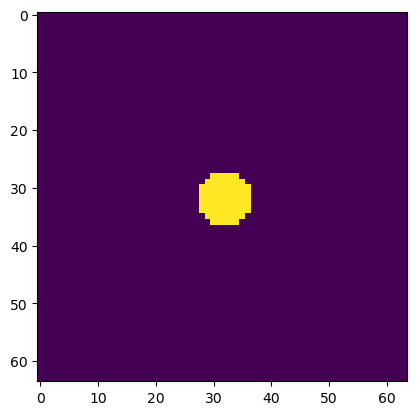

In [15]:
# Simple mask only counts pixels fully within a radia of
# 5 from the center of the image. Note that a proper solution
# would use a mask weighting the pixels with partial overlap,
# coming e.g. from Photutils.

mask = 1*((X-32)**2 + (Y-32)**2 < 5**2)
plt.imshow(mask)

Consider an image to image network, for example a denoiser. This
network keeps the image dimention unchanged.

In [10]:
net_denoise = nn.Conv2d(1,1, kernel_size=1)
img_denoised = net_denoise(inp)

print('Input shape:', tuple(inp.shape))
print('Denoised shape:', tuple(img_denoised.shape))

Input shape: (32, 1, 64, 64)
Denoised shape: (32, 1, 64, 64)


In [11]:
# And the denoised image require gradients.
img_denoised.requires_grad

True

In [12]:
# Note: If having a different mask per galaxy/exposures, you
# need a slight change, but would still be one line. No loops!
flux = (mask*img_denoised).sum(axis=[2,3])

In [13]:
# And the gradients will automatically be calculated.
flux.requires_grad

True

In [5]:
import torch

flux = torch.tensor([2.0, 3.0])

learning_rate = 0.1

optimizer = torch.optim.SGD([flux], lr=learning_rate)

for i in range(20):
    optimizer.zero_grad()
    
    loss = (flux ** 2).sum()
    loss.requires_grad_(True)
    loss.backward()
    optimizer.step()
    
    print(f"第 {i+1} 次循环: loss = {loss.item():.4f}, flux = {flux.data}")

第 1 次循环: loss = 13.0000, flux = tensor([2., 3.])
第 2 次循环: loss = 13.0000, flux = tensor([2., 3.])
第 3 次循环: loss = 13.0000, flux = tensor([2., 3.])
第 4 次循环: loss = 13.0000, flux = tensor([2., 3.])
第 5 次循环: loss = 13.0000, flux = tensor([2., 3.])
第 6 次循环: loss = 13.0000, flux = tensor([2., 3.])
第 7 次循环: loss = 13.0000, flux = tensor([2., 3.])
第 8 次循环: loss = 13.0000, flux = tensor([2., 3.])
第 9 次循环: loss = 13.0000, flux = tensor([2., 3.])
第 10 次循环: loss = 13.0000, flux = tensor([2., 3.])
第 11 次循环: loss = 13.0000, flux = tensor([2., 3.])
第 12 次循环: loss = 13.0000, flux = tensor([2., 3.])
第 13 次循环: loss = 13.0000, flux = tensor([2., 3.])
第 14 次循环: loss = 13.0000, flux = tensor([2., 3.])
第 15 次循环: loss = 13.0000, flux = tensor([2., 3.])
第 16 次循环: loss = 13.0000, flux = tensor([2., 3.])
第 17 次循环: loss = 13.0000, flux = tensor([2., 3.])
第 18 次循环: loss = 13.0000, flux = tensor([2., 3.])
第 19 次循环: loss = 13.0000, flux = tensor([2., 3.])
第 20 次循环: loss = 13.0000, flux = tensor([2., 3.])


In [2]:
import time
import torch
import numpy as np

batch_size = 32
data = torch.randn(batch_size, 1, 96, 96).cuda()

# 测试转换时间
start_time = time.time()
data_np = data.cpu().detach().numpy()
result_np = data_np * 2 + 1
result_tensor = torch.tensor(result_np, device=data.device)
end_time = time.time()
print(f"转换+计算时间: {(end_time - start_time)*1000:.2f} ms")

# 对比纯 GPU 计算
start_time = time.time()
result_gpu = data * 2 + 1
end_time = time.time()
print(f"纯GPU计算时间: {(end_time - start_time)*1000:.2f} ms")

转换+计算时间: 3.48 ms
纯GPU计算时间: 0.58 ms
